In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import requests as rq

In [69]:
topo_json = rq.get('http://0.0.0.0:8080/topology_graph').json()
host_json = rq.get('http://0.0.0.0:8080/hosts')

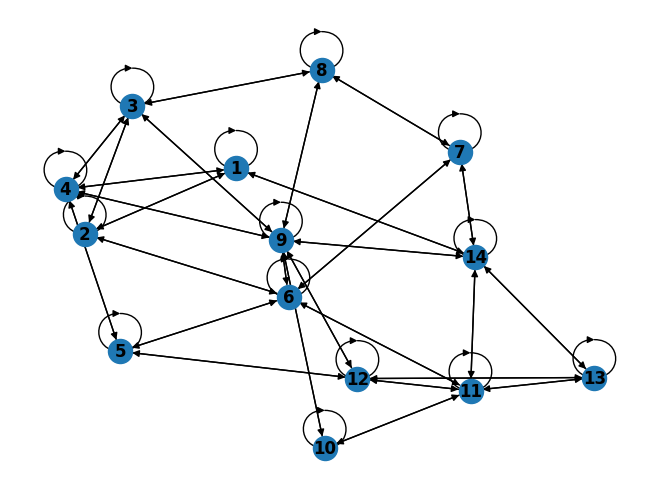

In [72]:
# json to networkx object
graph = nx.json_graph.node_link_graph(topo_json)
# plot graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [ ]:
for host in host_json['hosts']:
    host_id = int(host['mac'].translate(str.maketrans('','',":.- ")), 16)
    graph.add_node(f'h{host_id}', type='host')
    # add bi-directional link between host and switch
    graph.add_edge(f'h{host_id}', int(host['port']['dpid']), type='host')
    graph.add_edge(int(host['port']['dpid']), f'h{host_id}', type='host')

nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

TypeError: 'Response' object is not subscriptable

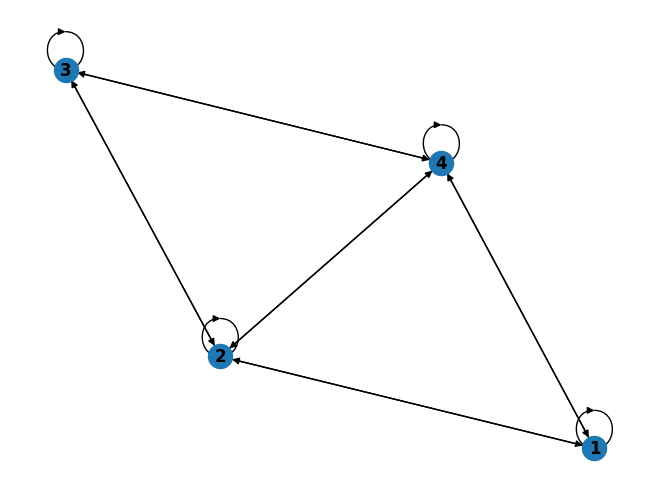

<class 'numpy.ndarray'>
[[], [2, 3, 4], [1, 3], [1, 2, 4], [1, 3]]
{2: 1, 3: 2, 4: 3, 1: 4}


In [ ]:
mapping = dict(zip(graph.nodes(), range(1, len(graph.nodes())+1)))
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()
# number of nodes
number_node = len(graph.nodes())
bin_matrix = nx.adjacency_matrix(graph).todense()
print(type(bin_matrix))
adj_matrix = [[] for i in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

print(adj_matrix)
print(mapping)

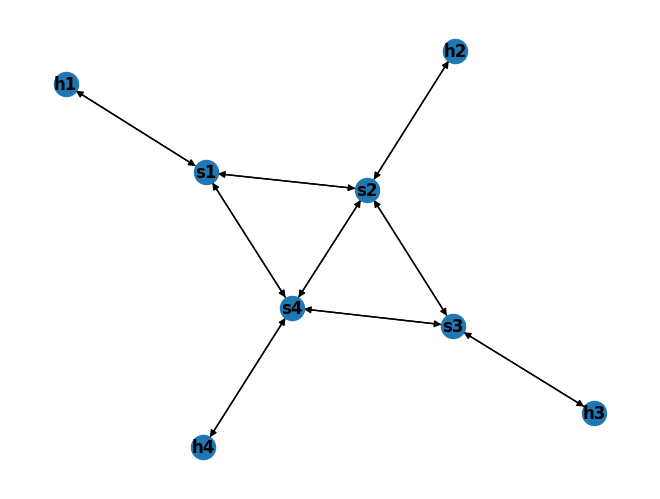

In [ ]:
import networkx as nx
import requests as rq
import matplotlib.pyplot as plt

graph = nx.json_graph.node_link_graph(rq.get('http://0.0.0.0:8000/graph').json())
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()


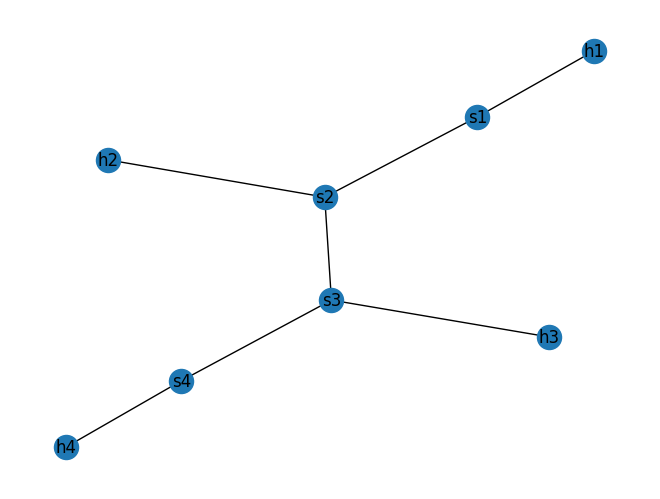

In [ ]:
from scenario.mn_network.mn_restapi.spanning_tree import SpanningTree
new_graph = SpanningTree(graph, 1).solution_as_networkx()
nx.draw(new_graph, with_labels=True)

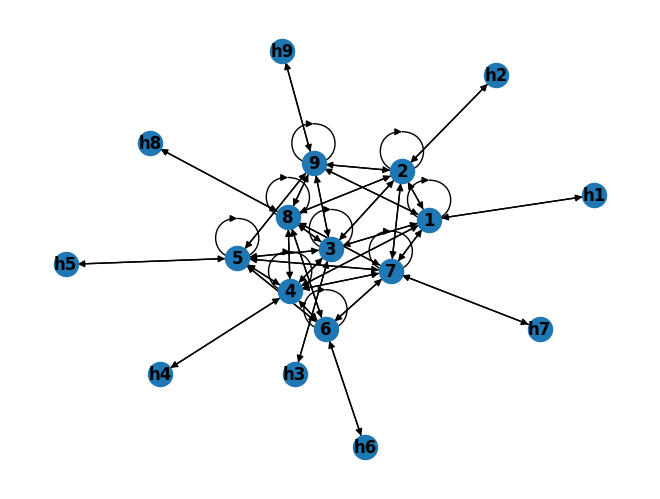

In [68]:
# topo from json
topo_json = {'directed': True, 'multigraph': False, 'graph': {}, 'nodes': [{'id': 1}, {'id': 2}, {'id': 7}, {'id': 3}, {'id': 5}, {'id': 8}, {'id': 9}, {'id': 4}, {'id': 6}, {'type': 'host', 'id': 'h6'}, {'type': 'host', 'id': 'h1'}, {'type': 'host', 'id': 'h5'}, {'type': 'host', 'id': 'h3'}, {'type': 'host', 'id': 'h7'}, {'type': 'host', 'id': 'h4'}, {'type': 'host', 'id': 'h9'}, {'type': 'host', 'id': 'h2'}, {'type': 'host', 'id': 'h8'}], 'links': [{'weight': 0, 'packet_loss': 0, 'delay': 0, 'source': 1, 'target': 1}, {'weight': 1, 'lldpdelay': 0.016286134719848633, 'delay': 15.226125717163086, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'packet_loss': 0.0, 'source': 1, 'target': 2}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.000437041972018628, 'source': 1, 'target': 7}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.0004368964368964472, 'source': 1, 'target': 9}, {'weight': 1, 'lldpdelay': 0.8782427310943604, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.00043704197201866114, 'source': 1, 'target': 4}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 1, 'target': 3}, {'type': 'host', 'source': 1, 'target': 'h1'}, {'weight': 0, 'packet_loss': 0, 'source': 2, 'target': 2}, {'weight': 1, 'lldpdelay': 0.01670694351196289, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'packet_loss': 0.0, 'source': 2, 'target': 1}, {'weight': 1, 'lldpdelay': 0.018683433532714844, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'packet_loss': 0.0, 'source': 2, 'target': 7}, {'weight': 1, 'lldpdelay': 0.013427972793579102, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005967365967366109, 'packet_loss': 0.0, 'source': 2, 'target': 3}, {'weight': 1, 'lldpdelay': 0.03544926643371582, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'packet_loss': 0.0, 'source': 2, 'target': 8}, {'weight': 1, 'lldpdelay': 0.01618218421936035, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'packet_loss': 0.0, 'source': 2, 'target': 9}, {'type': 'host', 'source': 2, 'target': 'h2'}, {'weight': 0, 'packet_loss': 0, 'source': 7, 'target': 7}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.000437041972018628, 'source': 7, 'target': 1}, {'weight': 1, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'lldpdelay': 0.017641544342041016, 'packet_loss': 0.0, 'source': 7, 'target': 2}, {'weight': 1, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764157322, 'lldpdelay': 0.022651195526123047, 'packet_loss': 0.0, 'source': 7, 'target': 5}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 7, 'target': 8}, {'weight': 1, 'lldpdelay': 0.03019857406616211, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'packet_loss': 0.06666666666666667, 'source': 7, 'target': 4}, {'weight': 1, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005967365967366109, 'lldpdelay': 0.009995698928833008, 'packet_loss': 0.0, 'source': 7, 'target': 6}, {'type': 'host', 'source': 7, 'target': 'h7'}, {'weight': 0, 'packet_loss': 0, 'source': 3, 'target': 3}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 3, 'target': 1}, {'weight': 1, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005967365967366109, 'lldpdelay': 0.011812448501586914, 'packet_loss': 0.0, 'source': 3, 'target': 2}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.0002770562770562626, 'source': 3, 'target': 5}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 3, 'target': 8}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.00027714856762159, 'source': 3, 'target': 9}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 3, 'target': 4}, {'type': 'host', 'source': 3, 'target': 'h3'}, {'weight': 0, 'packet_loss': 0, 'source': 5, 'target': 5}, {'weight': 1, 'lldpdelay': 0.026691198348999023, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764157322, 'packet_loss': 0.5, 'source': 5, 'target': 7}, {'weight': 1, 'lldpdelay': 0.3762087821960449, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.0002770562770562626, 'source': 5, 'target': 3}, {'weight': 1, 'lldpdelay': 0.17485523223876953, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 5, 'target': 9}, {'weight': 1, 'lldpdelay': 0, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.00043704197201866114, 'source': 5, 'target': 4}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.000437041972018628, 'source': 5, 'target': 6}, {'type': 'host', 'source': 5, 'target': 'h5'}, {'weight': 0, 'packet_loss': 0, 'source': 8, 'target': 8}, {'weight': 1, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'lldpdelay': 0.023305416107177734, 'packet_loss': 0.0, 'source': 8, 'target': 2}, {'weight': 1, 'lldpdelay': 0.25931382179260254, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 8, 'target': 7}, {'weight': 1, 'lldpdelay': 0.30903124809265137, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 8, 'target': 3}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 8, 'target': 9}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.00043704197201866114, 'source': 8, 'target': 4}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.0004368964368964141, 'source': 8, 'target': 6}, {'type': 'host', 'source': 8, 'target': 'h8'}, {'weight': 0, 'packet_loss': 0, 'source': 9, 'target': 9}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.0004368964368964472, 'source': 9, 'target': 1}, {'weight': 1, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'lldpdelay': 0.013512372970581055, 'packet_loss': 0.0, 'source': 9, 'target': 2}, {'weight': 1, 'lldpdelay': 0.24705266952514648, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.00027714856762159, 'source': 9, 'target': 3}, {'weight': 1, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 9, 'target': 5}, {'weight': 1, 'lldpdelay': 0.31197071075439453, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 9, 'target': 8}, {'type': 'host', 'source': 9, 'target': 'h9'}, {'weight': 0, 'packet_loss': 0, 'source': 4, 'target': 4}, {'weight': 1, 'lldpdelay': 0.24376583099365234, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.00043704197201866114, 'source': 4, 'target': 1}, {'weight': 1, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005969353764156871, 'lldpdelay': 0.030826330184936523, 'packet_loss': 0.1, 'source': 4, 'target': 7}, {'weight': 1, 'lldpdelay': 0.3780946731567383, 'free_bandwidth': 9999.999722851433, 'link_usage': 0.000277148567621569, 'source': 4, 'target': 3}, {'weight': 1, 'lldpdelay': 4.7694411277771, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.00043704197201866114, 'source': 4, 'target': 5}, {'weight': 1, 'lldpdelay': 0.5323901176452637, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.00043704197201866114, 'source': 4, 'target': 8}, {'weight': 1, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.0004368964368964141, 'source': 4, 'target': 6}, {'type': 'host', 'source': 4, 'target': 'h4'}, {'weight': 0, 'packet_loss': 0, 'source': 6, 'target': 6}, {'weight': 1, 'lldpdelay': 0.011169195175170898, 'free_bandwidth': 9999.999403064623, 'link_usage': 0.0005967365967366109, 'packet_loss': 0.0, 'source': 6, 'target': 7}, {'weight': 1, 'lldpdelay': 0.12090086936950684, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.000437041972018628, 'source': 6, 'target': 5}, {'weight': 1, 'lldpdelay': 0.32610177993774414, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.0004368964368964141, 'source': 6, 'target': 8}, {'weight': 1, 'lldpdelay': 0, 'free_bandwidth': 9999.999562958028, 'link_usage': 0.0004368964368964141, 'source': 6, 'target': 4}, {'type': 'host', 'source': 6, 'target': 'h6'}, {'type': 'host', 'source': 'h6', 'target': 6}, {'type': 'host', 'source': 'h1', 'target': 1}, {'type': 'host', 'source': 'h5', 'target': 5}, {'type': 'host', 'source': 'h3', 'target': 3}, {'type': 'host', 'source': 'h7', 'target': 7}, {'type': 'host', 'source': 'h4', 'target': 4}, {'type': 'host', 'source': 'h9', 'target': 9}, {'type': 'host', 'source': 'h2', 'target': 2}, {'type': 'host', 'source': 'h8', 'target': 8}]}
graph = nx.json_graph.node_link_graph(topo_json)
# plot graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [34]:
host_json = rq.get('http://0.0.0.0:8080/hosts').json()

def mac_to_int(mac):
    return int(mac.translate(str.maketrans('','',":.- ")), 16)

for host in host_json['hosts']:
    mac_dpid = mac_to_int(host['port']['dpid'])
    mac_host = mac_to_int(host['mac'])

mac_dpid

8

In [49]:
host_json = rq.get('http://0.0.0.0:8080/hosts').json()

def mac_to_int(mac_address):
    mac_parts = mac_address.replace(':', '').replace('-', '').replace('.', '')
    mac_int = int(mac_parts, 16)
    return mac_int

def hex_to_int(hex_value):
    return int(hex_value, 16)

for host in host_json['hosts']:
    # Convert mac to int for node
    host_port_to_dpid = hex_to_int(host.get('port').get('dpid'))
    host_id = mac_to_int(host['mac'])

    # print(f'raw host_id: {host["mac"]}, host_port_to_dpid: {host["port"]["dpid"]}')
    # print(f'host_id: {host_id}, host_port_to_dpid: {host_port_to_dpid}')
    print(type(host.get('port').get('dpid')))



<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [47]:
int('0000000000000006', 16)

6